# Number of tweets

In [24]:
import ndjson
from glob import glob
from datetime import datetime
import os, sys

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.dates as mdates
import pyplot_themes as themes

In [3]:
def ndjson_gen(filepath: str):
    for in_file in glob(filepath):
        with open(in_file) as f:
            reader = ndjson.reader(f)

            for post in reader:
                yield post

In [15]:
dates = [post["group"] for post in ndjson_gen('../summarized_emo/tweets_emo_n_date.ndjson')]
dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]
n_tweets = [post["n"] for post in ndjson_gen('../summarized_emo/tweets_emo_n_date.ndjson')]

In [60]:
# overall number of tweets
sum(n_tweets)

43555069

In [48]:
def plot_ntweets(x, y, axis_color='darkgrey', smooth=False, save_fig = False, plot_name = None):
    fontsize = 20

    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    a4_dims = (25,15)


    #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
    # palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    palette = sns.color_palette("rocket")

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    if smooth:
        raw_color = palette[5]
        smooth_color = palette[1]
    else:
        raw_color = 'black'


    locator = mdates.MonthLocator()  # every month
    date_form = mdates.DateFormatter("%b-%Y")
    X = plt.gca().xaxis
    X.set_major_locator(locator)

    plt.plot(x, y, color=raw_color, alpha=0.8)

    if smooth:
        plt.plot(x, smooth, color=smooth_color, linewidth=3)


    # axis
    ax1.set(xlabel="")

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")#, alpha=0.5)
    # Define the date format
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(date_form)
    ax1.tick_params(axis='both', labelsize=20, colors=axis_color)
    ax1.yaxis.label.set_color(axis_color)
    plt.xticks(rotation=90)
    every_nth = 3
    for n, label_ in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label_.set_visible(False)

    plt.ylabel("N tweets", color=axis_color, size=35)

    plt.subplots_adjust(hspace=0.3)
    if save_fig:
        plt.savefig(plot_name)
    plt.show()

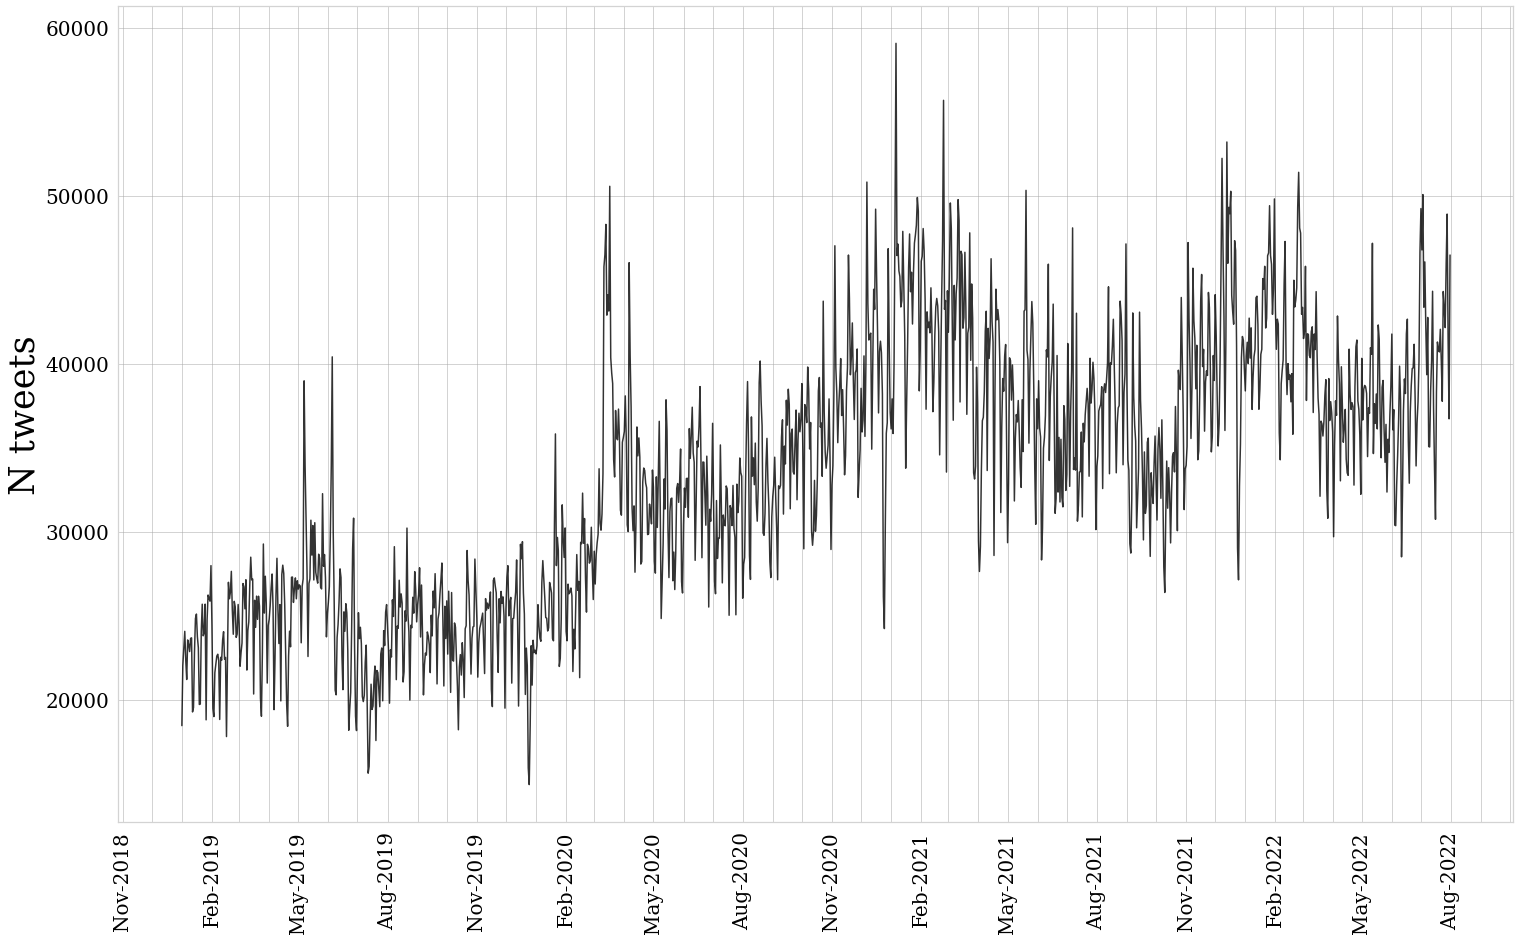

In [23]:
plot_ntweets(x=dates, y=n_tweets, axis_color='black', 
             save_fig=False, plot_name='../fig/n_tweets.png')

In [57]:
# smoothing
path = os.path.join("..", "newsFluxus", "src")
sys.path.append(path)
import news_uncertainty

smoothed_ntweets = news_uncertainty.adaptive_filter(n_tweets, span=100)
smoothed_ntweets = smoothed_ntweets.reshape(-1).tolist()[0]  # making it from matrix to list

path = os.path.join("..", "..", "notebooks")
sys.path.append(path)

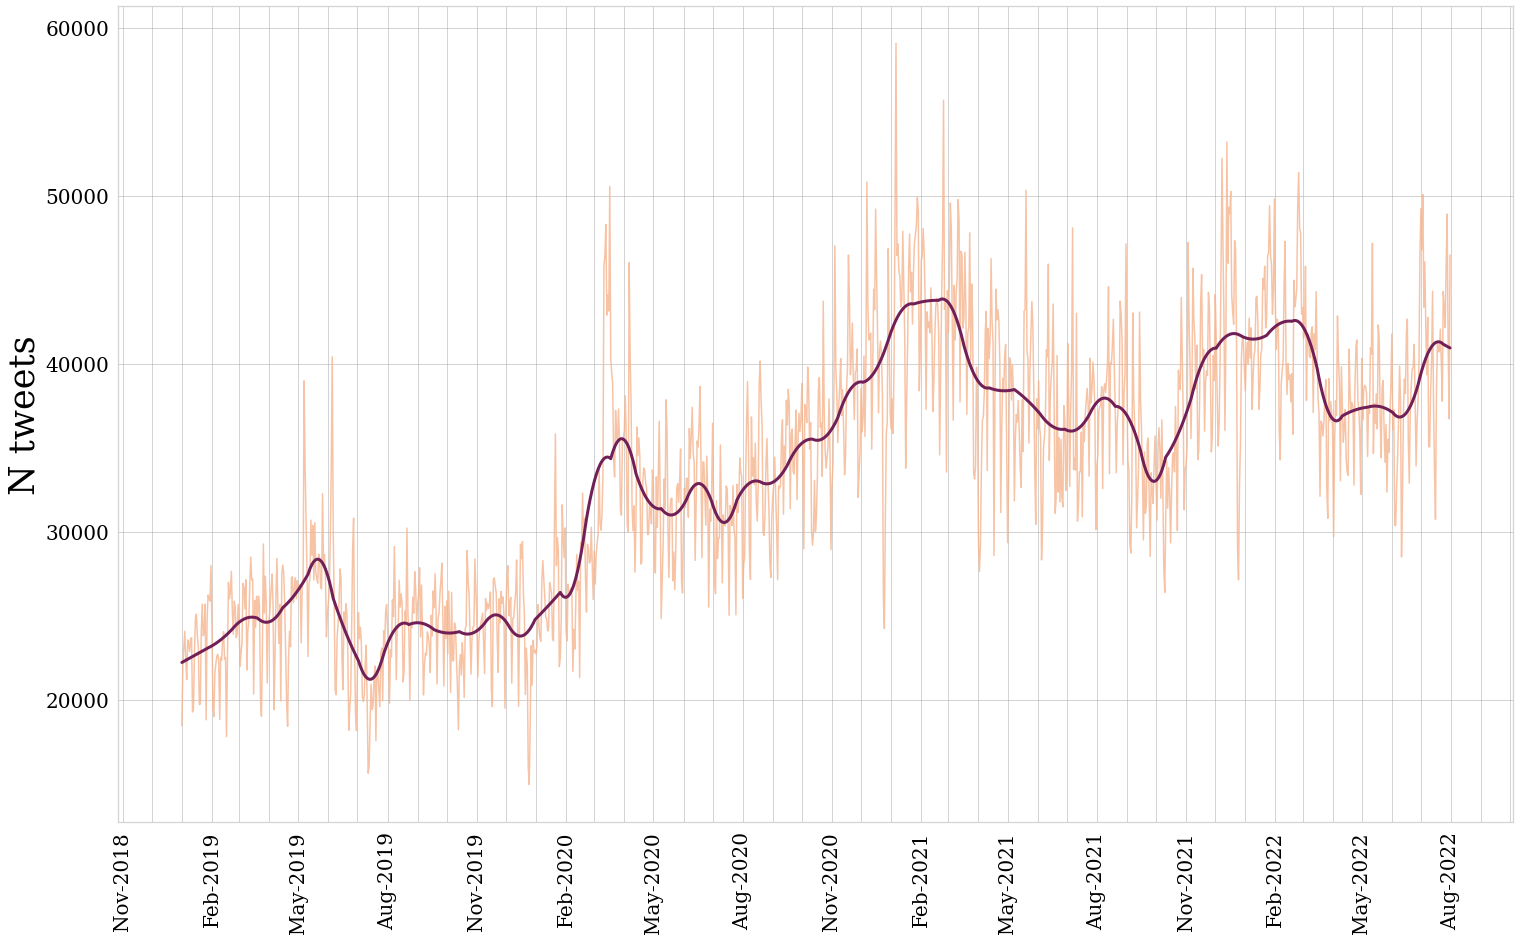

In [59]:
plot_ntweets(x=dates, y=n_tweets, axis_color='black', smooth=smoothed_ntweets,
             save_fig=True, plot_name='../fig/n_tweets_smooth.png')